# 밈으로서 '문과' 분석하기

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Kkma
from collections import Counter
from ast import literal_eval
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_colwidth', -1)

In [ ]:
df = pd.read_csv('문과라서.csv')
df2 = pd.read_csv('이과라서.csv')

In [ ]:
# '문과라서' 이후의 문맥 
def after_context(text):
    try:
        after = text.split('문과라서')[1]
        if after.startswith(' '):
            after = after[1:]
        return after
    except:
        return ''


df['after_context'] = df['Text'].apply(lambda x: after_context(x))

In [ ]:
# '이과라서' 이후의 문맥
def after_context2(text):
    try:
        after = text.split('이과라서')[1]
        if after.startswith(' '):
            after = after[1:]
        return after
    except:
        return ''


df2['after_context'] = df2['Text'].apply(lambda x: after_context2(x))

## 1. 형태소 분석

In [ ]:
kkma = Kkma()

def pos(text):
    try:
        pos = kkma.pos(text)
        return pos
    except:
        return []

In [ ]:
df['pos'] = df['after_context'].apply(lambda x: pos(x))
df2['pos'] = df2['after_context'].apply(lambda x: pos(x))

In [ ]:
m_pos = [item for sublist in df['pos'].tolist() for item in sublist if item[1] in ['VV', 'VA']]
e_pos = [item for sublist in df2['pos'].tolist() for item in sublist if item[1] in ['VV', 'VA']]

In [25]:
print('문과라서~ 자주 나오는 동사/형용사')
pd.DataFrame(Counter(m_pos).most_common(10), columns=['word', 'freq'])

문과라서~ 자주 나오는 동사/형용사


,word,freq
0,"(하, VV)",1146
1,"(모르, VV)",783
2,"(보, VV)",596
3,"(있, VV)",585
4,"(같, VA)",445
5,"(없, VA)",357
6,"(그러, VV)",329
7,"(알, VV)",324
8,"(되, VV)",280
9,"(그렇, VA)",253


In [26]:
print('이과라서~ 자주 나오는 동사/형용사')
pd.DataFrame(Counter(e_pos).most_common(10), columns=['word', 'freq'])

이과라서~ 자주 나오는 동사/형용사


,word,freq
0,"(하, VV)",1341
1,"(같, VA)",719
2,"(없, VA)",536
3,"(보, VV)",489
4,"(그렇, VA)",433
5,"(모르, VV)",428
6,"(있, VV)",397
7,"(좋, VA)",391
8,"(그러, VV)",333
9,"(알, VV)",331


In [27]:
m_pos = [item for sublist in df['pos'].tolist() for item in sublist if item[1] in ['NNG']]
e_pos = [item for sublist in df2['pos'].tolist() for item in sublist if item[1] in ['NNG']]

In [29]:
print('문과라서~ 자주 나오는 명사')
pd.DataFrame(Counter(m_pos).most_common(10), columns=['word', 'freq'])

문과라서~ 자주 나오는 명사


,word,freq
0,"(문과, NNG)",570
1,"(이과, NNG)",543
2,"(이해, NNG)",369
3,"(수학, NNG)",320
4,"(과학, NNG)",295
5,"(말, NNG)",264
6,"(때, NNG)",222
7,"(사진, NNG)",210
8,"(미분, NNG)",201
9,"(벽, NNG)",199


In [30]:
print('이과라서~ 자주 나오는 명사')
pd.DataFrame(Counter(e_pos).most_common(10), columns=['word', 'freq'])

이과라서~ 자주 나오는 명사


,word,freq
0,"(이과, NNG)",384
1,"(말, NNG)",333
2,"(문과, NNG)",326
3,"(때, NNG)",276
4,"(반, NNG)",275
5,"(생각, NNG)",259
6,"(수학, NNG)",216
7,"(과학, NNG)",189
8,"(사람, NNG)",165
9,"(애, NNG)",154


In [7]:
# https://towardsdatascience.com/statistical-significance-with-the-help-of-python-1fbb318ce216
def compute_p_val(df, df2, column):
    mean_difference = df[column].mean() - df2[column].mean()
    # a series of all values
    all_df = pd.concat([df, df2])
    all_negatives = all_df[column]

    mean_differences = []
    # for loop to create our 1000 permutations
    for i in range(1000):
        # empty array to represent a random total sales w/ profile pic
        group_a = []
        # empty array to represent a random total sales w/o profile pic
        group_b = []

        # use a for loop to randomonly place the total sales in one of the two lists
        for negatives in all_negatives:
            random_value = np.random.random()
            # randomally assinging each value to a new list
            if random_value > 0.85:
                group_a.append(negatives)
            elif random_value <= 0.85:
                group_b.append(negatives)
        mean_group_a = np.mean(group_a)
        mean_group_b = np.mean(group_b)
        # find the itteration mean and append to our mean difference list
        iteration_mean_difference = mean_group_a - mean_group_b
        mean_differences.append(iteration_mean_difference)

    # use matplotlib to visulize the mean_differences list as a histogram
    plt.hist(mean_differences)
    plt.show()


    total = 0

    # for loop to check if random mean diff is greater than our mean difference
    for mean_diff in mean_differences:
        if mean_diff >= mean_difference:
            total += 1

    # p value calculated by calulating percentage of values greater then the mean difference
    p_value = total / 1000

    print('******************')
    print('column name: ', column)
    print('p-value: ', p_value)

In [8]:
math = [('수학', 'NNG'), ('과학', 'NNG')]
lang = [('국어', 'NNG'), ('영어', 'NNG')]

negative = [('모르', 'VV'), ('몰', 'VV')]
positive = [('잘하', 'VV'), ('알', 'VV')]

def check_math(pos):
    return any(x in pos for x in math)

def check_lang(pos):
    return any(x in pos for x in lang)

def check_negative(pos):
    return any(x in pos for x in negative)

def check_positive(pos):
    return any(x in pos for x in positive)

df['math'] = df['pos'].apply(lambda x: check_math(x))
df2['math'] = df2['pos'].apply(lambda x: check_math(x))

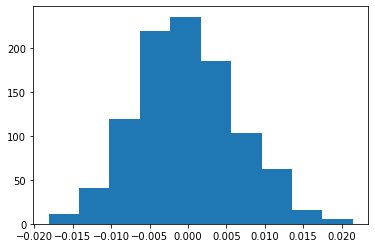

******************
column name:  math
p-value:  0.0


In [9]:
compute_p_val(df, df2, 'math') 

In [10]:
# 수학, 과학
print('문과: ', df['math'].mean())
print('이과: ', df2['math'].mean())

문과:  0.07887679444707367
이과:  0.054035567715458276


In [74]:
x = ['문과라서', '이과라서']
y = [df['math'].mean()*100, df2['math'].mean()*100]
text = ['7.88%', '5.40%']

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=text,
            textposition='auto',
        )])
fig.update_layout(title={'text': '문/이과라서 뒤에 "수학"이나 "과학"을 언급한 비율(%)', 'y':0.86, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_yaxes(range = [0,20])
fig.show()

In [11]:
df['lang'] = df['pos'].apply(lambda x: check_lang(x))
df2['lang'] = df2['pos'].apply(lambda x: check_lang(x))

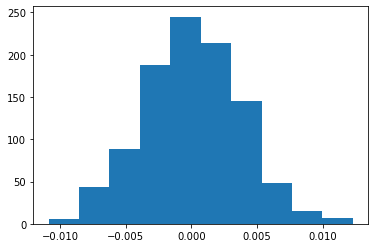

******************
column name:  lang
p-value:  0.684


In [12]:
# 국어, 영어
compute_p_val(df, df2, 'lang') 

In [13]:
print('문과: ', df['lang'].mean())
print('이과: ', df2['lang'].mean())

문과:  0.020350212967345006
이과:  0.022058823529411766


In [72]:
x = ['문과라서', '이과라서']
y = [df['lang'].mean()*100, df2['lang'].mean()*100]
text = ['2.03%', '2.20%']

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=text,
            textposition='auto',
        )])
fig.update_layout(title={'text': '문/이과라서 뒤에 "국어"나 "영어"를 언급한 비율(%)', 'y':0.86, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_yaxes(range = [0,20])
fig.show()

In [16]:
df['negative'] = df['pos'].apply(lambda x: check_negative(x))
df2['negative'] = df2['pos'].apply(lambda x: check_negative(x))

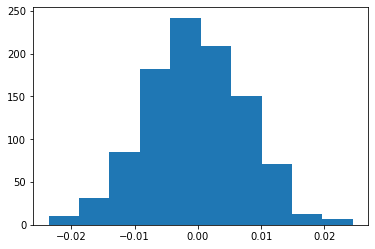

******************
column name:  negative
p-value:  0.0


In [17]:
# 모르다 
compute_p_val(df, df2, 'negative') 

In [18]:
print('문과: ', df['negative'].mean())
print('이과: ', df2['negative'].mean())

문과:  0.13819214387127307
이과:  0.08002735978112176


In [71]:
x = ['문과라서', '이과라서']
y = [df['negative'].mean()*100, df2['negative'].mean()*100]
text = ['13.81%', '8.00%']

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=text,
            textposition='auto',
        )])
fig.update_layout(title={'text': '문/이과라서 "모른다"라고 말한 비율(%)', 'y':0.86, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_yaxes(range = [0,20])
fig.show()

In [19]:
df['positive'] = df['pos'].apply(lambda x: check_positive(x))
df2['positive'] = df2['pos'].apply(lambda x: check_positive(x))

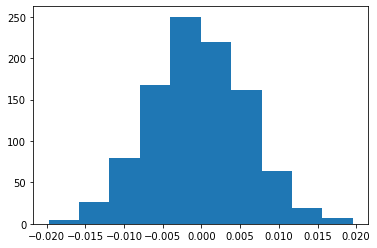

******************
column name:  positive
p-value:  0.907


In [20]:
# 잘하다, 알다
compute_p_val(df, df2, 'positive') 

In [21]:
print('문과: ', df['positive'].mean())
print('이과: ', df2['positive'].mean())

문과:  0.05773781353525793
이과:  0.0661764705882353


In [70]:
x = ['문과라서', '이과라서']
y = [df['positive'].mean()*100, df2['positive'].mean()*100]
text = ['5.77%', '6.61%']

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=text,
            textposition='auto',
        )])
fig.update_layout(title={'text': '문/이과라서 "잘한다", "안다"라고 말한 비율(%)', 'y':0.86, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_yaxes(range = [0,20])
fig.show()

## 2. 감정 분석

In [ ]:
# 문과/이과 별 평균 감정 점수
# 최댓값, 최솟값 예문 

In [32]:
df = pd.read_csv('문과_sentiment.csv')
df2 = pd.read_csv('이과_sentiment.csv')

In [33]:
df.head()

,sentence,sentiment
0,교수는아니고 대학원생..이제 문과라서 교수님5분대기조인,0.217593
1,내가 문과라서 센스가 좀 뛰어나,0.861239
2,머? 그장도면... 근데 난 문과라서 사실 잘 모르겟어,0.091926
3,사실 문과라서 잘(머쓱,0.484847
4,"지구과학 쌤은 맨날 느긋한 목소리로 우리 아들이 어렸을 적에 ~적에,, 이러셨는데....",0.998351


In [40]:
def classify_sentiment(sentiment):
    return 1 if sentiment > 0.5 else 0 

df['classified_sentiment'] = df['sentiment'].apply(lambda x: classify_sentiment(float(x)))
df2['classified_sentiment'] = df2['sentiment'].apply(lambda x: classify_sentiment(float(x)))

In [41]:
df['classified_sentiment'].mean()

0.422937371825209

In [42]:
df2['classified_sentiment'].mean()

0.4109097127222982

In [64]:
x = ['문과라서', '이과라서']
y = [df['classified_sentiment'].mean()*100, df2['classified_sentiment'].mean()*100]
text = ['42.29', '41.09']

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=text,
            textposition='auto',
        )])
fig.update_layout(title={'text': '문/이과에 따른 평균 감정 점수 (100점 만점)', 'y':0.86, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_yaxes(range = [0,100])
fig.show()

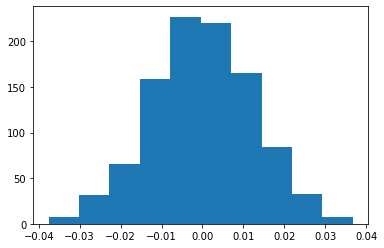

******************
column name:  classified_sentiment
p-value:  0.171


In [43]:
# 감정 점수의 차이는 유의미하지 않음 
compute_p_val(df, df2, 'classified_sentiment')

In [52]:
# 문과의 감정 점수 top 10
top_idx = np.array(df['sentiment']).argsort()[-10:][::-1]
df.iloc[top_idx]

,sentence,sentiment,classified_sentiment
409,저는 학교과 완전 문과라서 마더텅 국어 문학이랑 독서 사서 푸는데 문제 난이도가 조금 높은것도 있긴 하지만 해설이 너무너무 잘 나와있어요! 하나하나 꼼꼼하게 나와있어서 혼자 공부해도 될만큼 좋은 문제집!!,0.999500,1
125,한국어의 다양한 쓰임새를 보게 되고 정말 문과라서 대단한... 웹소 읽으면서 국문 공부 하는 기분으로 새삼 다시 배우게 되는 그런 소설😢,0.999466,1
298,문과라서 패는 것도 남달라 멋져 이과인데 본받고 싶다,0.999466,1
585,"우리 형과 Greeksage님이 말씀하신 책\n읽고 있습니다. 책의 추천사를 유발하라리, 일론머스크, 레이커즈와일, 스티븐호킹 등 엄청난 분들이 써주셨네요~아직 100쪽까지 밖에 안 읽었지만 너무 재밌습니다. 문과라서 걱정했는데 오히려 좋네요🙂",0.999455,1
1766,화학?? 나는 문과라서 잘 모르는 분야인데 더 멋지다!! 맹고 원래 이관가? 꼭 사랑을 이루면 좋겠다🥰,0.999452,1
2762,\n\n종잡을 수 없네 그대를 향한\n이 감정\n\n종이에 글쓰는 거 좋아해요\n이과 아니고 문과라서\n\n종달새는 하늘이 아파\n이리도 울었나\n\n종이학도 학인데\n이 인생도 인생이지\n\n종종 생각났는데\n이렇게 만나니 반가워요\n\n종료라 생각했지만\n이듬해 새 시작이었다\n\n종아리\n이미터 주쥰 다리길어,0.999445,1
1140,"사실 저 문과라서 이과의 수학을 모르겟어요. 아니 문과도 배웠나? 하지만 간지나니까 됐습니다... 하루와 했던 모든 대화가 좋았어요... 결이는 하루에게 자기얘기 해준 만큼 하루의 이야기도 듣고, 공감해주고 싶어햇답니다ㅜㅜ 아구 우리 하루ㅜㅜ",0.999440,1
6283,난 좋았어!! 나 문과라서 사탐 한지세지 이기상쌤만 보고 메가 끊은건데 이기상쌤 말고도 국영수 괜찮은 쌤들 많아서 잘 들었어!!,0.999435,1
3971,"우석이는 진짜 말할때, 글을쓸때 한마디 한마디가 너무 이뻐서 좋다ㅠㅠ나도 문과라서 우석이의 문과감성 백번 공감할 수 있어!!ㅠㅠ사실 부럽기도해...말 너무 시적으로 잘해...❤말까지 이쁜 우석이❤",0.999435,1
71,진자 머..저런친구가 다잇지 싶을정도로 팍팍한 현대에 ?같은 친구가..잇서 입시준비함서 힘든거 말하고 햇더니 내 자소서를 진심으로 첨삭해주는거임.. 글도 잘쓰는친구고 어휘력도 좋은 찐문과라서,0.999430,1


In [53]:
# 문과의 감정 점수 bottom 10
bottom_idx = np.array(df['sentiment']).argsort()[:10]
df.iloc[bottom_idx]

,sentence,sentiment,classified_sentiment
834,대사 창의성도 없지.....\n그래서 계속 에스프레소한테 머리 쓰게는 하는데 이것도 뭐.. 별로.. 줄 수 있는 게 이것밖에 없구나 근데 이것도 그나마.. 미안..문과라서 ... 문관데 대사 센스 없는 문과라..미안허이~,0.001191,0
4212,아........진짜존나힘들어 배운적도없는걸 시험치고. .... 같읁날에 환경관련 자유주제발표까짗하는게 말이댐???? 심지어나는 문과라서 아는게한개두업는데 대본없이 15분. 발표해야댐 진짜장난하는것도아니고 . . .,0.001221,0
4520,잠 잘오는약 저거 근거 있는건가여? 문과라서몰라,0.001280,0
920,아이쒸.... 뭐라는 건지 1도 이해안가는 거 정상 맞아요? 내가 문과라서 그런거야?,0.001403,0
3518,"문과라서 왜 죄송한지. 문송 이딴 소리 유머라고 하는 모양인데, 재미도 없고 신선하지도 않고 괜한 편견만 만든다. 사과는각자하고 소속집단을 끌어들이지 맙시다. 사는 것도 힘든데 무슨 죄송 타령이야.",0.001419,0
1779,고1 첫 모고 과학 4점 맞음ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 문과라서 과학 1도 몰라 #본인의_시험_최저점수,0.001422,0
1284,게게진짜좆같네... 만화에 무하한 술식 설명 거지같은 거부터 마음에 안들었음 웅엥웅 난 문과라서 설명이 힘드러 이지랄하지 말고 최소한 수렴과 발산을 어느정도는 알고 가져다 붙였으면 좋겠어,0.001431,0
291,타고난 순도 백프로 문과라서... 국어 영어 행법 국사 다 괜찮았는데 사회 하다가 경제 부분에서 이를 갈았음 실제 성적도 제일 개판이었다 아예 손도 못 대고 3번으로 줄세우고 옴ㅋㅋ,0.001438,0
1384,아진짜로 확률 뭔 소린지 모르겠어ㅋㅋㅋㅋㅋㅋㅋㅋ미치겠다ㅋㅋㅋㅋㅋ문과라서 확통했는데도 개어렵네,0.001444,0
5864,상식수준 내용 들고와서 문과라서 모른대~~~ 이러냐 개짜증나,0.001461,0


In [54]:
# 이과의 감정 점수 top 10
top_idx = np.array(df2['sentiment']).argsort()[-10:][::-1]
df2.iloc[top_idx]

,sentence,sentiment,classified_sentiment
606,이과라서 사탐은 모르겠는데 국어는 마더텅 추천드려요.. 고3도 엄청 많이 풀고 해설자 두꺼운데 설명 엄청 세세하게 잘 되어있어서 혼자 공부하기에도 조아요..,0.999493,1
1282,저도 이과라서... 더 멋있는 것 같아요\n학창시절의 그들 \n얼마나 공돌이엿던...,0.999461,1
439,이과라서 딱딱하다구 하는데 나한테는 언니가 언니 닉넴처럼 부드러워😘 난 언니가 너무 조아 언니가 이제는 안힘들었으면 좋겠다ㅠㅠㅠ 난 언니랑 친해진게 너무 좋아 힘들때마다 뎀하면 내가 아재개그로 웃겨줄게💗 언니 사룽해💗💗,0.999455,1
5767,"이과라서 그런거 같기도 하고, 예전부터 글 같은걸 못 썼어요. 가끔 글 잘쓰는 친구들 보면 부럽기도 했는데... 그래도 잭한테 제 마음이 잘 전달되서 다행이네요. 잭의 말에서도 진심이 잘 느껴져요. :)",0.999453,1
1394,궁금하네요 맞팔하고싶다 제가 뼈이과라서 그런지;;ㅜ 예술인에 대한 로망과 동경과 환상이 엄청난데... 히라카오의 예술적 어쩌고들을 이해할 수 없으면서도 오히려 그런 점 때문에 더... 사랑하게 되더라고요 금강님 트윗들을 읽다보면 무대 뒤의 평범한... 그치만 여전히 이해할 수 없는,0.999442,1
5338,난 감정적인 이과라서 (=병신) .. 이런 차분하면서 이성적이며 블랙유머를 구사하는 사람들을 보면 그냥 좋다.... 문과 여러분 제발 저와 놀아주세요...,0.999442,1
3390,저말 너무 멋있다\n손이 타버릴 듯 뜨거울지라도 담고 싶은 태양이 있다면 죽어도 놓지 말것\nㅠㅜㅜㅜ 이과라서 지영쌤 강의는 안들었지만... 너무 멋있어요 ㅜㅜ,0.999436,1
705,내가 이과라서 비과학적 사실들에 순간순간 조금씩 감동을 받지 못한 부분들이 있긴 했는데... 그걸 감안하더라도 그냥 벅차고 좋은 극이었어ㅠㅠㅠ,0.999430,1
4660,저는 놀랍게도 초연 녹화중 본사인데 화케랑 빛케는 매우 달라서 오늘 보는 재미가 쏠쏠했네요... 빛케 굉장히 큰 고양이과라서 밍의신 건드릴 때마다 고양이가 앞발로 툭툭 치는 느낌이 머릿속을 떠나지 않았고,0.999430,1
3859,무엇보다도 윱의 케이가 참 마음에 들었다.\n개인적으로 고양이과의 케이가 있으면 강아지과의 케이도 있을 수 있다고 생각하고 초연때의 케이들이 두분다 고양이과라서 내가 궁금해하던 강아지과 케이를 제대로 보여주셨다 ㅎㅎㅎ\n그 결과 5번 중 4번이 윱케이였다는 ㅎㅎㅎ,0.999430,1


In [55]:
# 이과의 감정 점수 bottom 10
bottom_idx = np.array(df2['sentiment']).argsort()[:10]
df2.iloc[bottom_idx]

,sentence,sentiment,classified_sentiment
584,..이과라서 소용X,0.001324,0
1766,그런거 물어 보면 애눈이 땡그래지면서 저 이과라서 몰라요. 이럽니다. 그럼 문과애들은 잘아냐? 문과애들은 선택이 아니라서 모릅니다. 이럽니다.\n\n기본은 해야죠. 기본도 못하는 개같은 교육이 뭔 전문지식이 필요한가요. 그렇다고 전문적이지도 않은게 또 선택과목 교육들입니다. 개판이에요 그냥다,0.001368,0
2095,본인이 이과라서 뭐 어쩌라고요.... 저희 보고 알아서 짜깁기해서 쓰라구요...?,0.001379,0
2599,제제제가 뼈속까지 이과라서 필력 느갭수준잉에요.....,0.001387,0
5626,거 같은 이과라서 산책하다 들렀습니다 라고 되도않는!!!!!!!!!!!!!!궁색한변명을늘어놓는!!!!!!!이태성을!!!!!!어쩌면좋으냐!!!!!!!!!,0.001393,0
597,"답이 없어요\n스토리 제정신인가? 역시 카프카가 이과라서 그런건가? 미친건가? 또라인가? 때려치고 싶은건가? 랄까.,",0.001455,0
961,너무어려워요 캡쳐내용으로밖에생각이들지안아서... 제가이과라서그런건지빡추라서그런건지구분할수없음,0.001465,0
1007,ㅅㅂ\n문송안함 나랑 장난하나\n이씨발\n나는문과라도안죄송한이세계로감을 읽고 싶었던 거지\n이과라서죄송한세계에서옴을 읽고 싶었던 게 아니라고,0.001491,0
1085,나 모고 풀었는데 점수 실화냐...\n짭이과이긴하지만 그래도.. 이과라서 그런지 글씨 읽기조차 너무 싫음....ㅠㅠㅠ 시간에 쫓겨서 제대로 읽는 지문도 없다쥬..?,0.001548,0
233,(아차... 반반하지도 않고 이과라서 실패.....),0.001548,0
